<a href="https://colab.research.google.com/github/Shimon-Singh/Data-Mining/blob/main/Data_Mining_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical-1

**Q1. Create a file “people.txt” with the following data:**



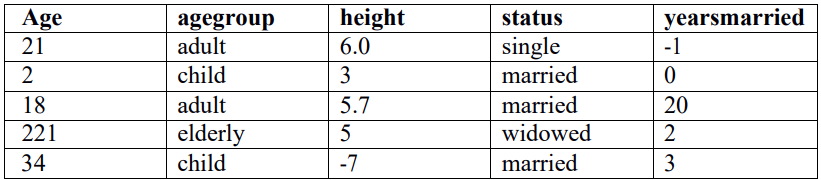

In [ ]:
import pandas as pd
import numpy as np

data = """Age AgeGroup Height Status YearsMarried
21 adult 6.0 single -1
2 child 3 married 0
18 adult 5.7 married 20
221 elderly 5 widowed 2
34 child -7 married 3"""

with open("people.txt", "w") as file:
    file.write(data)

**i) Read the data from the file “people.txt”**

In [ ]:
#i) Read the data from the file “people.txt”.

df = pd.read_csv("people.txt", delimiter=" ")
df

,Age,AgeGroup,Height,Status,YearsMarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


**ii) Create a ruleset E that contain rules to check for the following conditions:**

In [ ]:
#1. The age should be in the range 0-150.

rule1=df['Age'].apply(lambda x:True if x>=0 and x<=150 else False)
rule1

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool

In [ ]:
#2. The age should be greater than yearsmarried.

rule2=df.apply(lambda x: True if x.Age>x.YearsMarried else False, axis=1)
rule2

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [ ]:
#3. The status should be married or single or widowed.

rule3=df.apply(lambda x: True if x.Status=="married" or x.Status=="single" or x.Status=="widowed" else False, axis=1)
rule3

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [ ]:
#4. If age is less than 18 the agegroup should be child, if age is between 18 and 65
#the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

rule4=df.apply(lambda x: True if(x.Age<18 and x.AgeGroup=="child")or
              (x.Age<65 and x.AgeGroup=="adult")or
              (x.Age>65 and x.AgeGroup=="elderly") else False, axis=1)
rule4

0     True
1     True
2     True
3     True
4    False
dtype: bool

**iii) Check whether ruleset E is violated by the data in the file people.txt.**

In [ ]:
rules=pd.DataFrame({"Rule 1":rule1,"Rule 2":rule2, "Rule 3":rule3, "Rule 4":rule4})
rules

,Rule 1,Rule 2,Rule 3,Rule 4
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,False,True,True,True
4,True,True,True,False


**iv.) Summarize the results obtained in part (iii)**

In [ ]:
rules.astype(int)

,Rule 1,Rule 2,Rule 3,Rule 4
0,1,1,1,1
1,1,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,1,1,0


In [ ]:
for i in range(1, 5, 1):
    print("Summary of Rule",i)

    print("Number of rules violated for Rule", i, "=", len(rules) - rules["Rule " + str(i)].sum())
    print("Count of both categories for Rule", i, "=\n", rules["Rule " + str(i)].value_counts())

    print("\n")

Summary of Rule 1
Number of rules violated for Rule 1 = 1
Count of both categories for Rule 1 =
 Rule 1
True     4
False    1
Name: count, dtype: int64


Summary of Rule 2
Number of rules violated for Rule 2 = 1
Count of both categories for Rule 2 =
 Rule 2
True     4
False    1
Name: count, dtype: int64


Summary of Rule 3
Number of rules violated for Rule 3 = 0
Count of both categories for Rule 3 =
 Rule 3
True    5
Name: count, dtype: int64


Summary of Rule 4
Number of rules violated for Rule 4 = 1
Count of both categories for Rule 4 =
 Rule 4
True     4
False    1
Name: count, dtype: int64




**v) Visualize the results obtained in part (iii)**

<Axes: >

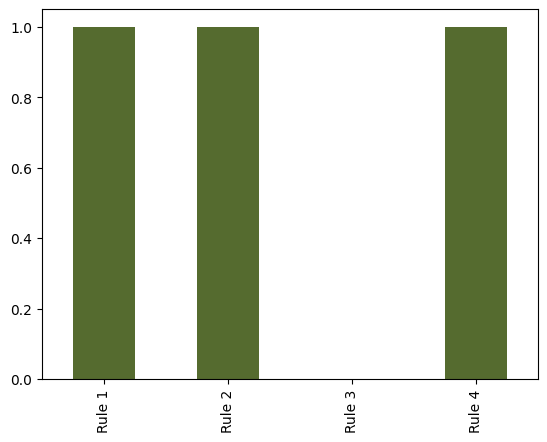

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

rules.apply(lambda x:len(x)-x.sum()).plot(kind='bar', color='darkolivegreen')

# Practical-2

**Q2. Perform the following preprocessing tasks on the dirty_iris dataset**

In [ ]:
import pandas as pd
import numpy as np


df=pd.read_csv('DirtyIris.csv')
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


**i) Calculate the number and percentage of observations that are complete.**

In [ ]:
df1=df.dropna()
df1

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
6,7,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...,...
141,142,6.9,3.1,5.1,2.3,virginica
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica


In [ ]:
df2=(df.isna().any(axis=1)==0).sum()
df2

131

In [ ]:
df3=(df2/len(df))*100
print("Percentage of No. of observation:",df3)

Percentage of No. of observation: 87.33333333333333


**ii) Replace all the special values in data with NA.**

In [ ]:
df['Sepal.Length'].unique()
df['Sepal.Width'].unique()
df['Petal.Length'].unique()
df['Petal.Width'].unique()
df['Petal.Width'].replace(np.inf,np.nan,inplace=True)
df['Petal.Width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

iii) Define these rules in a separate text file and read them.
(Use editfile function in R (package editrules). Use similar function in Python).
Print the resulting constraint object. **bold text**

In [ ]:
#1. Species should be one of the following values: setosa, versicolor or virginica.

rule1=(df["Species"]=="setosa") | (df["Species"]=="virginica") | (df["Species"]=="versicolor")
a=rule1.count()-rule1.sum()
a

5

In [ ]:
#2. All measured numerical properties of an iris should be positive

rule2=(df["Sepal.Length"]>0) | (df["Petal.Length"]>0) | (df["Petal.Width"]>0) | (df["Sepal.Length"]>0)
b=rule2.count()-rule2.sum()
b

0

In [ ]:
#3. The petal length of an iris is at least 2 times its petal width.

rule3=(df["Petal.Length"]) >(df["Petal.Width"].astype("float64")*2)
c=rule3.count()-rule3.sum()
c

0

In [ ]:
#4. The sepal length of an iris cannot exceed 30 cm.

rule4=df["Sepal.Length"]<30
d=rule4.count()-rule4.sum()
d

8

In [ ]:
#5. The sepals of an iris are longer than its petals.


rule5= df["Sepal.Length"]>df["Petal.Length"]
e = rule5.count() - rule5.sum()
e

8

**iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.**

In [ ]:
rules=pd.DataFrame({"Rule 1":rule1,"Rule 2":rule2, "Rule 3":rule3, "Rule 4":rule4, "Rule 5":rule5})
rules

,Rule 1,Rule 2,Rule 3,Rule 4,Rule 5
0,False,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,False,False
...,...,...,...,...,...
145,True,True,True,True,True
146,True,True,True,True,True
147,True,True,True,True,True
148,True,True,True,True,True


In [ ]:
rules.astype(int)

,Rule 1,Rule 2,Rule 3,Rule 4,Rule 5
0,0,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,0,0
...,...,...,...,...,...
145,1,1,1,1,1
146,1,1,1,1,1
147,1,1,1,1,1
148,1,1,1,1,1


In [ ]:
for i in range(1, 6, 1):
    print("Summary of Rule",i)

    print("Number of rules violated for Rule", i, "=", len(rules) - rules["Rule " + str(i)].sum())
    print("Count of both categories for Rule", i, "=\n", rules["Rule " + str(i)].value_counts())

    print("\n")

Summary of Rule 1
Number of rules violated for Rule 1 = 5
Count of both categories for Rule 1 =
 Rule 1
True     145
False      5
Name: count, dtype: int64


Summary of Rule 2
Number of rules violated for Rule 2 = 0
Count of both categories for Rule 2 =
 Rule 2
True    150
Name: count, dtype: int64


Summary of Rule 3
Number of rules violated for Rule 3 = 0
Count of both categories for Rule 3 =
 Rule 3
True    150
Name: count, dtype: int64


Summary of Rule 4
Number of rules violated for Rule 4 = 8
Count of both categories for Rule 4 =
 Rule 4
True     142
False      8
Name: count, dtype: int64


Summary of Rule 5
Number of rules violated for Rule 5 = 8
Count of both categories for Rule 5 =
 Rule 5
True     142
False      8
Name: count, dtype: int64




<Axes: >

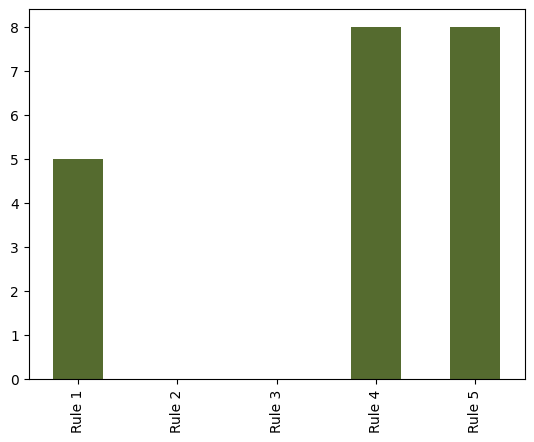

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

rules.apply(lambda x:len(x)-x.sum()).plot(kind='bar', color='darkolivegreen')

**v) Find outliers in sepal length using boxplot and boxplot.stats**


Outliers:  []


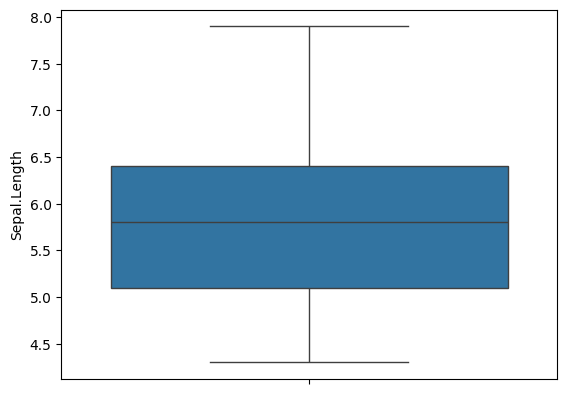

In [ ]:
from matplotlib.cbook import boxplot_stats
import seaborn as sns

df['Sepal.Length'] = df['Sepal.Length'].fillna(df['Sepal.Length'].mean())

stats = boxplot_stats(df['Sepal.Length'])

print("Outliers: ", stats[0]['fliers'])

sns.boxplot(y='Sepal.Length', data=df)
plt.show()


# Practical-3

**Q3. Load the data from wine dataset. Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). If not, standardize the attributes. Do the same with Iris dataset**

Min-Max normalization

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.datasets import load_wine, load_iris
iris=load_iris()
wine=load_wine()

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
min_max_scaler=MinMaxScaler()
normalized_data=min_max_scaler.fit_transform(df)
print(normalized_data)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


In [ ]:
print(normalized_data.mean())
print(normalized_data.std())

0.4084913360554177
0.21688619487069796


In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
min_max_scaler=MinMaxScaler()
normalized_data=min_max_scaler.fit_transform(df)
print(normalized_data)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [ ]:
print(normalized_data.mean())
print(normalized_data.std())

0.4486931104833647
0.26236724966560704


Standarization

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
iris2 =load_iris()

In [ ]:
df = pd.DataFrame(iris2.data,columns=iris2.feature_names)
df['Class'] = iris2.target
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
Class                1.000000
dtype: float64

In [ ]:
df.iloc[:,:4]
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
Class                0.819232
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:,:4])
scaled_data.mean()

-1.4684549872375404e-15

In [ ]:
scaled_data.std()

1.0

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
df1 = pd.DataFrame(wine.data,columns=wine.feature_names)
df1['Class'] = wine.target
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1.iloc[:,:13])
print(scaled_data)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [ ]:
scaled_data.mean()

4.66735072755122e-16

In [ ]:
scaled_data.std()

1.0

# Practical-4

**Q4. Run Apriori algorithm to find frequent itemsets and association rules**

In [ ]:
!pip install efficient-apriori

In [ ]:
from efficient_apriori import apriori
import pandas as pd
import numpy as np

In [ ]:
groceries=pd.read_csv('groceries.csv')
bakery=pd.read_csv('1000i.csv')

In [ ]:
groceries=groceries.drop(['Item(s)'],axis=1)
groceries

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
f=lambda record:[x for x in record if x is not np.nan]
transactions=list(map(f, groceries.values))
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [ ]:
#1.1 Use minimum support as 50% and minimum confidence as 75%

itemsets, rules=apriori(transactions, min_support=0.050, min_confidence=0.075)

In [ ]:
itemsets

{1: {('citrus fruit',): 814,
  ('margarine',): 576,
  ('tropical fruit',): 1032,
  ('yogurt',): 1372,
  ('coffee',): 571,
  ('whole milk',): 2513,
  ('pip fruit',): 744,
  ('other vegetables',): 1903,
  ('butter',): 545,
  ('rolls/buns',): 1809,
  ('bottled beer',): 792,
  ('bottled water',): 1087,
  ('curd',): 524,
  ('beef',): 516,
  ('frankfurter',): 580,
  ('soda',): 1715,
  ('fruit/vegetable juice',): 711,
  ('newspapers',): 785,
  ('pastry',): 875,
  ('root vegetables',): 1072,
  ('canned beer',): 764,
  ('sausage',): 924,
  ('brown bread',): 638,
  ('shopping bags',): 969,
  ('napkins',): 515,
  ('pork',): 567,
  ('whipped/sour cream',): 705,
  ('domestic eggs',): 624},
 2: {('other vegetables', 'whole milk'): 736,
  ('rolls/buns', 'whole milk'): 557,
  ('whole milk', 'yogurt'): 551}}

In [ ]:
rules

[{whole milk} -> {other vegetables},
 {other vegetables} -> {whole milk},
 {whole milk} -> {rolls/buns},
 {rolls/buns} -> {whole milk},
 {yogurt} -> {whole milk},
 {whole milk} -> {yogurt}]

In [ ]:
frequent_itemsets=[]
for size, itemset in itemsets.items():
    for items, support in itemset.items():
        frequent_itemsets.append((items, support))

In [ ]:
frequent_itemsets

[(('citrus fruit',), 814),
 (('margarine',), 576),
 (('tropical fruit',), 1032),
 (('yogurt',), 1372),
 (('coffee',), 571),
 (('whole milk',), 2513),
 (('pip fruit',), 744),
 (('other vegetables',), 1903),
 (('butter',), 545),
 (('rolls/buns',), 1809),
 (('bottled beer',), 792),
 (('bottled water',), 1087),
 (('curd',), 524),
 (('beef',), 516),
 (('frankfurter',), 580),
 (('soda',), 1715),
 (('fruit/vegetable juice',), 711),
 (('newspapers',), 785),
 (('pastry',), 875),
 (('root vegetables',), 1072),
 (('canned beer',), 764),
 (('sausage',), 924),
 (('brown bread',), 638),
 (('shopping bags',), 969),
 (('napkins',), 515),
 (('pork',), 567),
 (('whipped/sour cream',), 705),
 (('domestic eggs',), 624),
 (('other vegetables', 'whole milk'), 736),
 (('rolls/buns', 'whole milk'), 557),
 (('whole milk', 'yogurt'), 551)]

In [ ]:
sorted_itemsets=sorted(frequent_itemsets, key=lambda x:x[1], reverse=True)

In [ ]:
for items, support in sorted_itemsets:
    print(f"Items:{','.join(items)}-Support:{support}")

Items:whole milk-Support:2513
Items:other vegetables-Support:1903
Items:rolls/buns-Support:1809
Items:soda-Support:1715
Items:yogurt-Support:1372
Items:bottled water-Support:1087
Items:root vegetables-Support:1072
Items:tropical fruit-Support:1032
Items:shopping bags-Support:969
Items:sausage-Support:924
Items:pastry-Support:875
Items:citrus fruit-Support:814
Items:bottled beer-Support:792
Items:newspapers-Support:785
Items:canned beer-Support:764
Items:pip fruit-Support:744
Items:other vegetables,whole milk-Support:736
Items:fruit/vegetable juice-Support:711
Items:whipped/sour cream-Support:705
Items:brown bread-Support:638
Items:domestic eggs-Support:624
Items:frankfurter-Support:580
Items:margarine-Support:576
Items:coffee-Support:571
Items:pork-Support:567
Items:rolls/buns,whole milk-Support:557
Items:whole milk,yogurt-Support:551
Items:butter-Support:545
Items:curd-Support:524
Items:beef-Support:516
Items:napkins-Support:515


In [ ]:
top5=sorted_itemsets[:5]
top5

[(('whole milk',), 2513),
 (('other vegetables',), 1903),
 (('rolls/buns',), 1809),
 (('soda',), 1715),
 (('yogurt',), 1372)]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
item_names=[','.join(items) for items, _ in top5]
support_values=[support for _, support in top5]

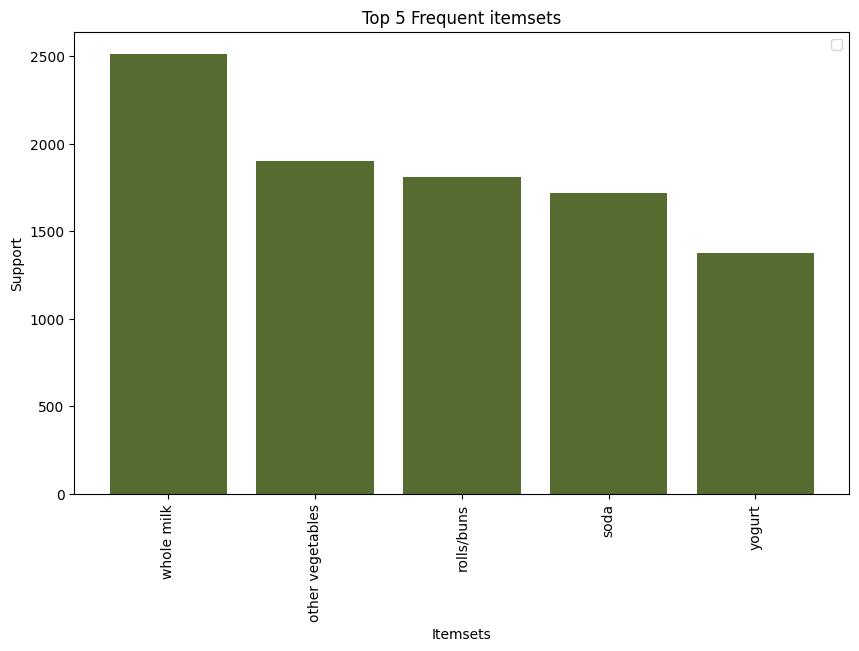

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(item_names,support_values, color= 'darkolivegreen')
plt.xticks(rotation=90)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 5 Frequent itemsets')
plt.legend()
plt.show()

In [ ]:
bakery

,1,3,7
0,1,4,15
1,1,2,49
2,1,5,44
3,2,1,1
4,2,2,19
...,...,...,...
3532,999,5,35
3533,999,2,3
3534,1000,4,15
3535,1000,3,47


In [ ]:
f=lambda record:[x for x in record if x is not np.nan]
transactions=list(map(f, bakery.values))
transactions[:5]

[[1, 4, 15], [1, 2, 49], [1, 5, 44], [2, 1, 1], [2, 2, 19]]

In [ ]:
#1.2 Use minimum support as 60% and minimum confidence as 60 %

itemsets, rules=apriori(transactions, min_support=0.060, min_confidence=0.060)
itemsets

{1: {(1,): 787, (4,): 851, (2,): 748, (5,): 745, (3,): 766}}

In [ ]:
rules

[]

In [ ]:
frequent_itemsets=[]
for size, itemset in itemsets.items():
    for items, support in itemset.items():
        frequent_itemsets.append((items, support))

In [ ]:
frequent_itemsets

[((1,), 787), ((4,), 851), ((2,), 748), ((5,), 745), ((3,), 766)]

In [ ]:
sorted_itemsets=sorted(frequent_itemsets, key=lambda x:x[1], reverse=True)


In [ ]:
top5=sorted_itemsets[:5]
top5

[((4,), 851), ((1,), 787), ((3,), 766), ((2,), 748), ((5,), 745)]

#Practical-5
Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers.
Divide the data set into training and test set. Compare the accuracy of the different classifiers
under the following situations:

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [ ]:
iris = load_iris()
x=iris.data
y=iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

Decision Tree Classification

In [ ]:
deci_tree = DecisionTreeClassifier(criterion='entropy')
deci_tree.fit(X_train, y_train)
prediction = deci_tree.predict(X_test)

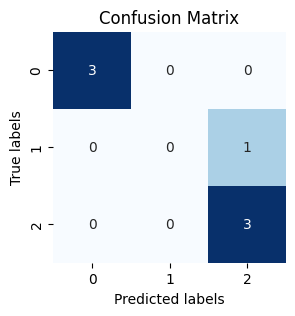

In [ ]:
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

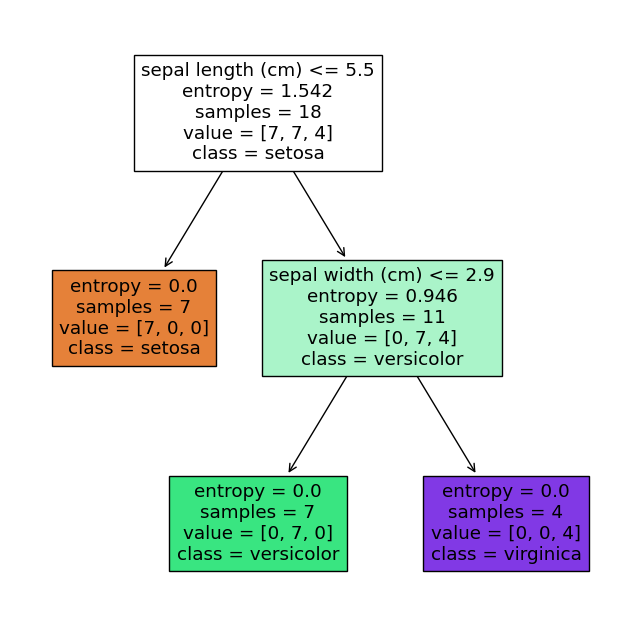

In [ ]:
# Plot the decision tree
plt.figure(figsize=(8, 8))
plot_tree(deci_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

plt.show()

In [ ]:
accuracy_dt = accuracy_score(y_test, prediction)
print("Accuracy on Hold Out method using classification:", accuracy_dt*100,"%")
a1=accuracy_dt*100
report = classification_report(y_test, prediction)
print("Classification Report:\n", report)


Accuracy on Hold Out method using classification: 85.71428571428571 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.58      0.67      0.62         7
weighted avg       0.75      0.86      0.80         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNearest Neighbour Classification

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)


# Ignore FutureWarning from scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
accuracy_knn = accuracy_score(y_test, prediction2)
print("Accuracy on Hold Out method using classification:", accuracy_knn*100,"%")
a2=accuracy_knn*100
report = classification_report(y_test, prediction2)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
prediction3 = nb.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(y_test, prediction3)
print("Accuracy on Hold Out method using classification:", accuracy_nb*100,"%")
a3=accuracy_nb*100
report = classification_report(y_test, prediction3)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



5.2) Training set is chosen by:
(i) hold out method

In [ ]:
k_size = 0.25 #taking test-size=25%
r_seeds = 100
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = k_size, random_state=r_seeds)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (112, 4)
Shape of X_test:  (38, 4)
Shape of y_train:  (112,)
Shape of y_test:  (38,)


(ii) Random subsampling

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

subsample_size = 25
test_size = 0.25  # 25% of the data will be used for testing
indices = np.random.choice(len(x), size=subsample_size, replace=True)

x_subsample = x[indices]
y_subsample = y[indices]

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_subsample, y_subsample, test_size=test_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier on the scaled training data
deci_tree = DecisionTreeClassifier(criterion="entropy")
deci_tree.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = deci_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         1
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



(iii) Cross-Validation

In [ ]:
svm = load_iris()
x = svm.data
y = svm.target

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tree,svm.data,svm.target,cv=5)

In [ ]:
mean_accuracy =scores.mean()
std_accuracy=scores.std()

In [ ]:
a4 = mean_accuracy*100
print(a4)

95.33333333333334


Compare the accuracy of the classifiers obtained.

In [ ]:
print("Accurcay of Decison Tree ",a1)
print("Accurcay of KNN ",a2)
print("Accurcay of Naive Bayes ",a3)
print("Accurcay of Cross Validation ",a4)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Accurcay of Decison Tree  85.71428571428571
Accurcay of KNN  100.0
Accurcay of Naive Bayes  100.0
Accurcay of Cross Validation  95.33333333333334
X_train shape: (18, 4)
y_train shape: (18,)


In [ ]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [ ]:
svm = load_breast_cancer()
x = svm.data
y = svm.target

In [ ]:
print(x.shape)

(569, 30)


In [ ]:
print(y.shape)

(569,)


In [ ]:
k_size = 0.333 #taking test-size=33.3%
r_seed = 100
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=k_size,random_state=r_seed)

In [ ]:
print("Shape of X_train" ,X_train.shape)
print("Shape of y_train" ,y_train.shape)
print("Shape of X_train" ,X_test.shape)
print("Shape of y_train" ,y_test.shape)

Shape of X_train (379, 30)
Shape of y_train (379,)
Shape of X_train (190, 30)
Shape of y_train (190,)


Decision Tree of Hold Out

In [ ]:
deci_tree =DecisionTreeClassifier(criterion ="entropy") # By default gini
deci_tree.fit(X_train,y_train)
prediction=deci_tree.predict(X_test)
accuracy_hold=accuracy_score(y_test,prediction)
a1= accuracy_hold*100
print( "Hold out ",a1)

Hold out  90.52631578947368


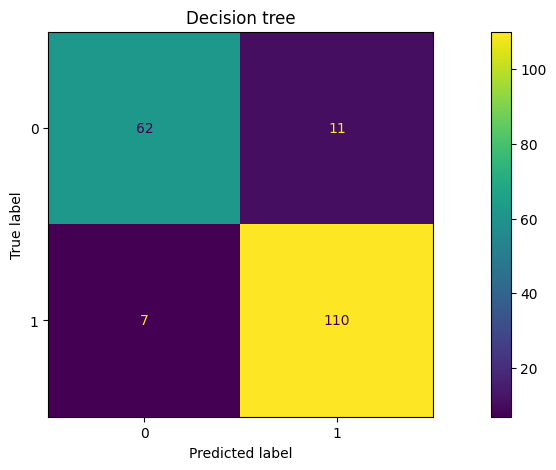

In [ ]:
fig,(ax1)=plt.subplots()
fig.set_size_inches(15,5)
ax1.set_title("Decision tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,X_test,y_test,ax=ax1)

K Nearst Neighbour

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy ")
a2 = knn.score(X_test,y_test)*100
print(a2)

Accuracy 
94.73684210526315


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
#fitting the model
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb =nb.predict(X_test)

print("Accuracy of Test Data")
nb_score=accuracy_score(y_test,prediction_nb)

a3 = nb_score*100
print("Naive Bayes Accuracy :",a3,"%")
print("Classification report on test data")
print(classification_report(y_test,prediction_nb))

Accuracy of Test Data
Naive Bayes Accuracy : 92.63157894736842 %
Classification report on test data
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        73
           1       0.91      0.97      0.94       117

    accuracy                           0.93       190
   macro avg       0.93      0.91      0.92       190
weighted avg       0.93      0.93      0.93       190



Decision Tree

In [ ]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    deci_tree.fit(x_train, y_train)
    dta.append(deci_tree.score(x_test, y_test))
a4 = np.mean(dta)*100
print("Decision tree accuracy: " ,a4,"%")

Decision tree accuracy:  93.47953216374269 %


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tree,svm.data,svm.target,cv=5)

In [ ]:
mean_accuracy =scores.mean()
std_accuracy=scores.std()

In [ ]:
a5 = mean_accuracy*100
print(a5)

92.61760596180716


Random Sub-Sampling

In [ ]:
svm = load_breast_cancer()
x = svm.data
y = svm.target

subsample_size = 25
test_size = 0.25  # 25% of the data will be used for testing
indices = np.random.choice(len(x), size=subsample_size, replace=True)

x_subsample = x[indices]
y_subsample = y[indices]

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_subsample, y_subsample, test_size=test_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier on the scaled training data
deci_tree = DecisionTreeClassifier(criterion="entropy")
deci_tree.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = deci_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
a6 = accuracy*100

# Generate classification report
report = classification_report(y_test, y_pred, target_names=svm.target_names) # because svm=load_breast_cancer
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00         3
      benign       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



Comparison of Accuracies

In [ ]:
print("Accurcay of Hold Out ",a1)
print("Accurcay of KNN ",a2)
print("Accurcay of Naive Bayes ",a3)
print("Accurcay of Cross Validation ",a4)
print("Accurcay of Decision Tree ",a5)
print("Accurcay of Random Sub-Sampling ",a6)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Accurcay of Hold Out  90.52631578947368
Accurcay of KNN  94.73684210526315
Accurcay of Naive Bayes  92.63157894736842
Accurcay of Cross Validation  93.47953216374269
Accurcay of Decision Tree  92.61760596180716
Accurcay of Random Sub-Sampling  100.0
X_train shape: (18, 30)
y_train shape: (18,)


#Practical-6

Q6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the
performance of clusters by changing the parameters involved in the algorithms.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
brct = load_breast_cancer()
x = brct.data
y = brct.target

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(x)
kmeans_score = accuracy_score(y, y_kmeans)
print("Accuracy Score - KMeans:", kmeans_score*100)

Accuracy Score - KMeans: 12.65377855887522


In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=1)
y_dbscan = dbscan.fit_predict(x)
dbscan_score = accuracy_score(y, y_dbscan)

print("Accuracy Score - DBSCAN:", dbscan_score*100)

Accuracy Score - DBSCAN: 0.17574692442882248


In [ ]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(x)
hc_score = accuracy_score(y, y_hc)
print("Accuracy Score - Hierarchical Clustering:", hc_score*100)

Accuracy Score - Hierarchical Clustering: 32.161687170474515


Text(0.5, 1.0, 'Hierarchical Clustering')

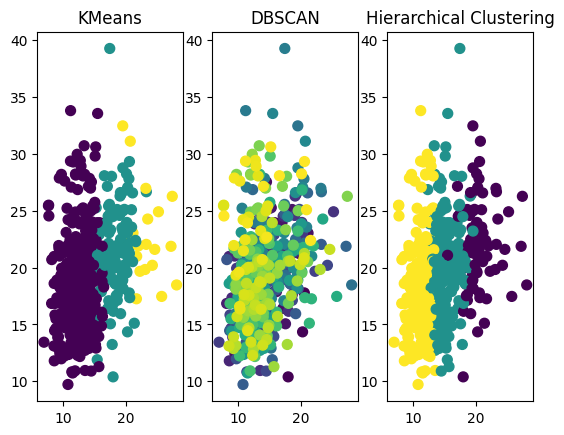

In [ ]:
plt.subplot(131)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("KMeans")
plt.subplot(132)
plt.scatter(x[:, 0], x[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN")
plt.subplot(133)
plt.scatter(x[:, 0], x[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")

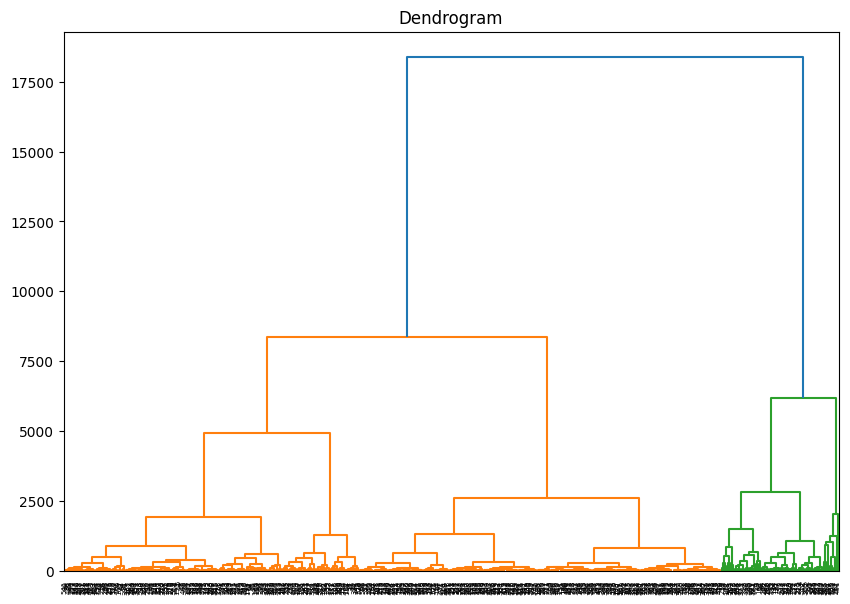

In [ ]:
linked = linkage(x, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.show()